# The Whole Truth Foods- Sales Analytics

## Importing Dataset

In [116]:
import pandas as pd

# Load the Excel file 
file_path = 'C:/Users/user/Downloads/BA Assignment.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Check the first few rows of the dataset
data.head()


,Order ID,Order Date,Quantity,GMV,Product Code,Category Name,Email
0,15285271,2023-12-31,15,1500.0,P004,A,yash_mani@flash.co
1,15285271,2023-12-31,15,1500.0,P004,A,yash_mani@flash.co
2,15284883,2023-12-31,5,700.0,P290,A,sjjw@hd.dkk
3,15284812,2023-12-31,5,700.0,P290,A,kkapadiaharsh95@gmail.com
4,15284545,2023-12-31,1,140.0,P150,A,sahilagarwal0011@gmail.com


In [117]:
data.tail()

,Order ID,Order Date,Quantity,GMV,Product Code,Category Name,Email
902542,9328118,2023-12-01,10,650.0,P242,P,pritty.kkamath@gmail.com
902543,9328116,2023-12-01,10,650.0,P242,P,dhavalbhadishiya@gmail.com
902544,9328106,2023-12-01,10,650.0,P242,P,snihagajwani4@gmail.com
902545,9328091,2023-12-01,10,650.0,P242,P,nikkilapraviinriddy@gmail.com
902546,9328061,2023-12-01,10,650.0,P242,P,yashjhaviri93@gmail.com


## Performing EDA (Exploratory Data Analysis)

In [9]:
data.dtypes

Order ID                  int64
Order Date       datetime64[ns]
Quantity                  int64
GMV                     float64
Product Code             object
Category Name            object
Email                    object
dtype: object

In [4]:
data.isnull().sum()  # Check for missing values in each column


Order ID         0
Order Date       0
Quantity         0
GMV              0
Product Code     0
Category Name    0
Email            0
dtype: int64

In [11]:
data.describe().round() 

,Order ID,Order Date,Quantity,GMV
count,902547.0,902547,902547.0,902547.0
mean,6791613.0,2022-03-26 11:40:16.261978368,3.0,335.0
min,2511.0,2019-10-20 00:00:00,1.0,0.0
25%,5633893.0,2021-07-04 00:00:00,1.0,100.0
50%,9078548.0,2022-04-27 00:00:00,1.0,200.0
75%,9249965.0,2023-01-18 00:00:00,2.0,400.0
max,15287762.0,2023-12-31 00:00:00,280.0,59880.0
std,3309951.0,NaN,4.0,504.0


# Getting Insights from Business Data

## 1) Total Unique Orders, Month on Month:
Group by Order Date (by month) and count the unique Order ID.

In [14]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.to_period('M')  # Extract month as a period

unique_orders_monthly = data.groupby('Month')['Order ID'].nunique().reset_index()
unique_orders_monthly.rename(columns={'Order ID': 'Unique Orders'}, inplace=True)

from IPython.display import display #Display output
display(unique_orders_monthly)


,Month,Unique Orders
0,2019-10,250
1,2019-11,929
2,2019-12,905
3,2020-01,1354
4,2020-02,1410
5,2020-03,3806
6,2020-04,967
7,2020-05,1567
8,2020-06,2467
9,2020-07,3360


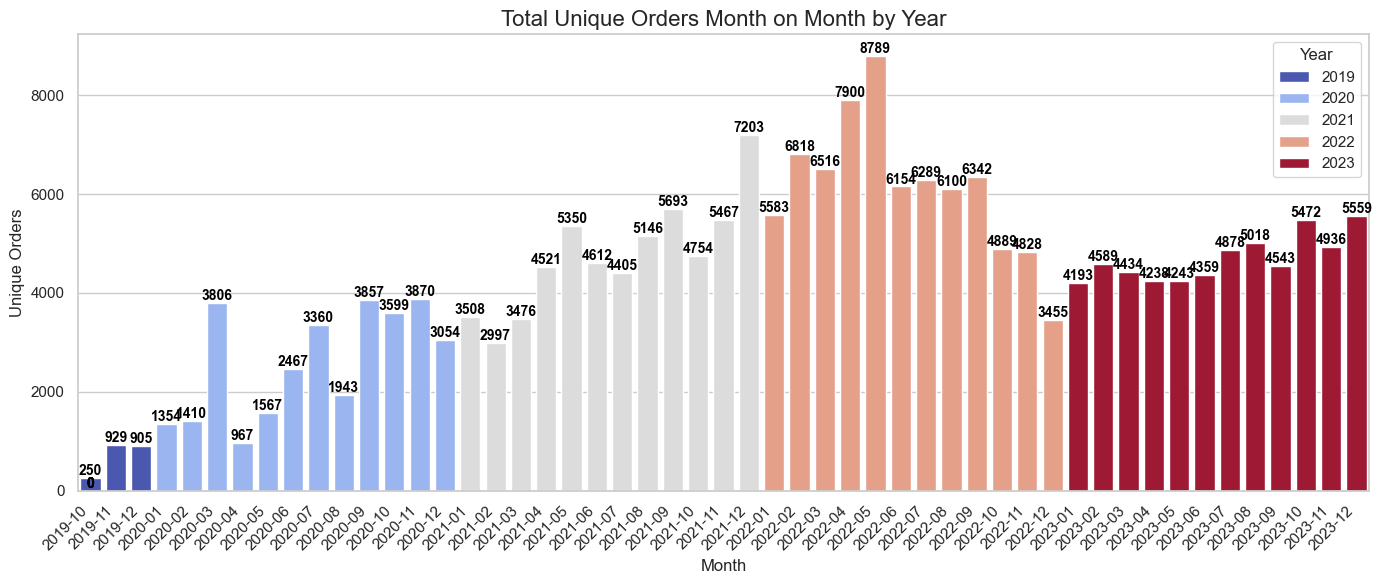

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# If 'Month' is already in period format, directly extract the year and month
# If 'Month' is in datetime64, convert to period if needed
unique_orders_monthly['Year'] = unique_orders_monthly['Month'].dt.year
unique_orders_monthly['Month_str'] = unique_orders_monthly['Month'].dt.strftime('%Y-%m')

# Set the style of the plot
sns.set(style="whitegrid")

# Create the figure and axis for the plot
plt.figure(figsize=(14, 6))

# Create the bar plot, using 'Year' for the hue (differentiates the bars by year)
ax = sns.barplot(x='Month_str', y='Unique Orders', data=unique_orders_monthly, hue='Year', palette='coolwarm')

# Add the count (Unique Orders) on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(f'{int(height)}',  # Display the number on top of the bar
                (p.get_x() + p.get_width() / 2., height),  # Positioning the label in the center of the bar
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unique Orders', fontsize=12)
plt.title('Total Unique Orders Month on Month by Year', fontsize=16)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## 2) Total Unique Consumers, Month on Month:
Group by Email and Order Date, count the unique consumers (emails) per month. 

In [25]:
# Extract Month from 'Order Date'
data['Month'] = data['Order Date'].dt.to_period('M')  # Extract 'YYYY-MM' period format

# Group by Month and count the unique consumers (emails)
unique_consumers_monthly = data.groupby('Month')['Email'].nunique().reset_index()

# Rename the 'Email' column to 'Unique Consumers' for clarity
unique_consumers_monthly.rename(columns={'Email': 'Unique Consumers'}, inplace=True)

# Display the result
display(unique_consumers_monthly)


,Month,Unique Consumers
0,2019-10,226
1,2019-11,798
2,2019-12,800
3,2020-01,1180
4,2020-02,1283
5,2020-03,3592
6,2020-04,830
7,2020-05,1177
8,2020-06,1958
9,2020-07,2649


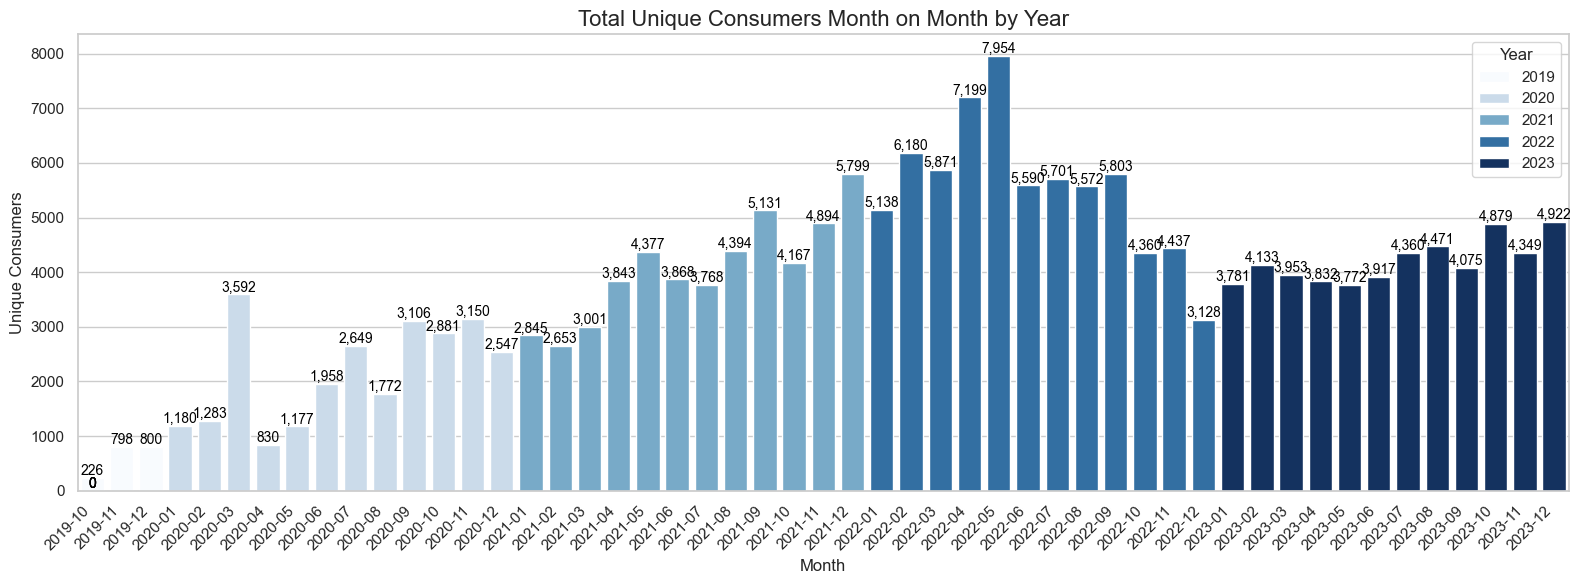

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from 'Month'
unique_consumers_monthly['Year'] = unique_consumers_monthly['Month'].dt.year

# Create the figure and axis for the plot
plt.figure(figsize=(16, 6))

# Create the bar plot using 'Year' as the hue and set a custom bar width
ax = sns.barplot(x='Month', y='Unique Consumers', data=unique_consumers_monthly, palette='Blues', hue='Year', width=0.8)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unique Consumers', fontsize=12)
plt.title('Total Unique Consumers Month on Month by Year', fontsize=16)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## 3) Count of New Users, Month on Month:
A "new user" is defined as a consumer who made their first purchase in that specific month.
Track the first order date per Email, then group by the month of the first purchase.

In [39]:
# Extract first purchase date for each user (Email)
first_purchase = data.groupby('Email')['Order Date'].min().reset_index()

# Extract the month of the first purchase
first_purchase['Month'] = first_purchase['Order Date'].dt.to_period('M')

# Group by 'Month' and count the number of new users (unique Emails) per month
new_users_monthly = first_purchase.groupby('Month')['Email'].nunique().reset_index()

# Rename the 'Email' column to 'New Users' for clarity
new_users_monthly.rename(columns={'Email': 'New Users'}, inplace=True)

# Display the result
display(new_users_monthly)


,Month,New Users
0,2019-10,226
1,2019-11,735
2,2019-12,658
3,2020-01,922
4,2020-02,1010
5,2020-03,3241
6,2020-04,434
7,2020-05,609
8,2020-06,1234
9,2020-07,1766


datetime64[ns]


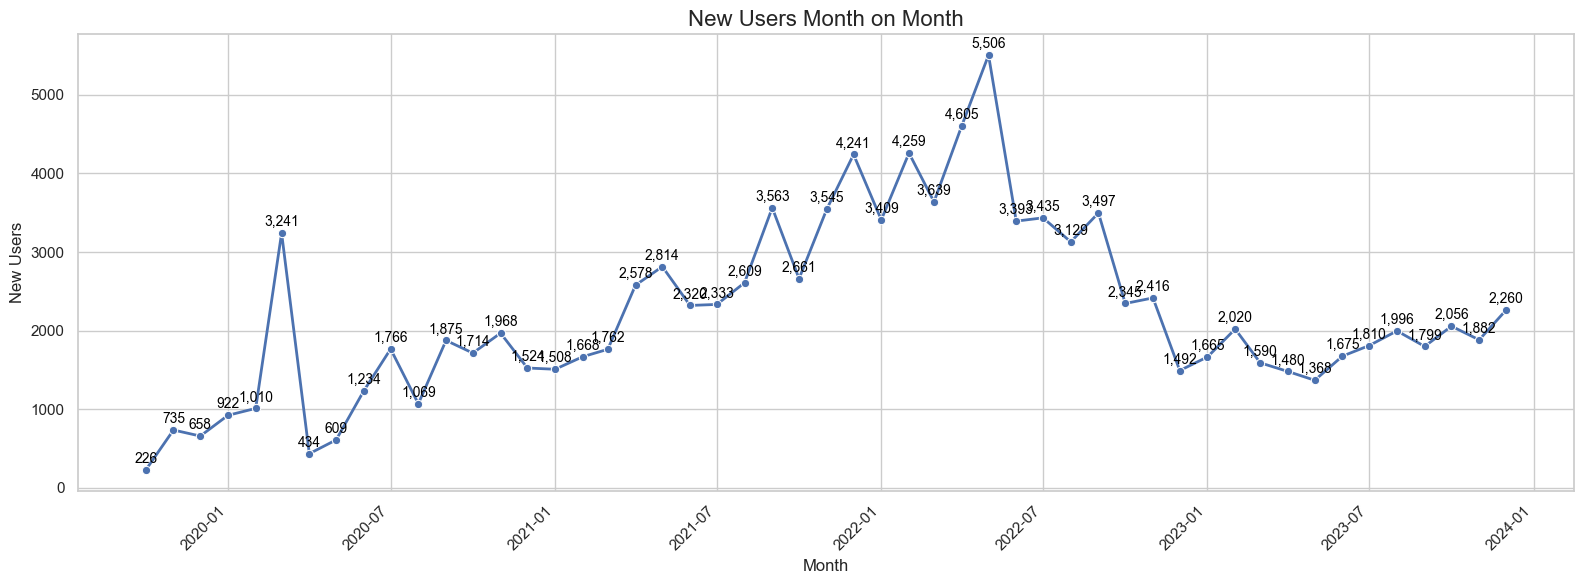

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data type of 'Month' column
print(new_users_monthly['Month'].dtype)

# If 'Month' is in Period format, convert it to datetime (timestamp)
if new_users_monthly['Month'].dtype == 'period[M]':
    new_users_monthly['Month'] = new_users_monthly['Month'].dt.to_timestamp()

# Set a professional style for the plot
sns.set(style="whitegrid")  # Clean grid background with white color

# Create the figure and axis for the plot
plt.figure(figsize=(16, 6))

# Create the line plot for new users over time (by Month)
ax = sns.lineplot(x='Month', y='New Users', data=new_users_monthly, marker='o', color='b', linewidth=2)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('New Users', fontsize=12)
plt.title('New Users Month on Month', fontsize=16)

# Add value labels (count and month) on top of each data point
for line in ax.lines:
    # Get the data points from the line plot
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    # Annotate each point with the corresponding value and month
    for i in range(len(x_data)):
        ax.annotate(f'{int(y_data[i]):,}', 
                    (x_data[i], y_data[i]),
                    textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='black')

# Display the plot with tight layout to prevent clipping
plt.tight_layout()
plt.show()


## 4) Total GMV Value from Repeat Users, Month on Month:
Identify "repeat users" (users who made more than one purchase).
Calculate GMV for these repeat users by month.

In [49]:
# Identify Repeat Users (users who made more than one purchase)
repeat_users = data[data.duplicated(subset='Email', keep=False)].copy()  # Using .copy() to ensure it's a new object

# Extract the month for each order (since 'Order Date' is already datetime64, no conversion needed)
repeat_users.loc[:, 'Month'] = repeat_users['Order Date'].dt.to_period('M')  # Use .loc to avoid the warning

# Group by Month and calculate total GMV for repeat users
repeat_users_monthly = repeat_users.groupby('Month')['GMV'].sum().reset_index()

# Rename GMV column for clarity
repeat_users_monthly.rename(columns={'GMV': 'GMV from Repeat Users'}, inplace=True)

# Format the GMV values with commas for better readability
repeat_users_monthly['GMV from Repeat Users'] = repeat_users_monthly['GMV from Repeat Users'].apply(lambda x: f'{x:,.2f}')

# Display the result
display(repeat_users_monthly)

,Month,GMV from Repeat Users
0,2019-10,"194,400.00"
1,2019-11,"741,000.00"
2,2019-12,"1,001,400.00"
3,2020-01,"2,245,200.00"
4,2020-02,"2,425,200.00"
5,2020-03,"2,724,600.00"
6,2020-04,"1,062,500.00"
7,2020-05,"1,551,200.00"
8,2020-06,"2,193,900.00"
9,2020-07,"3,625,197.00"


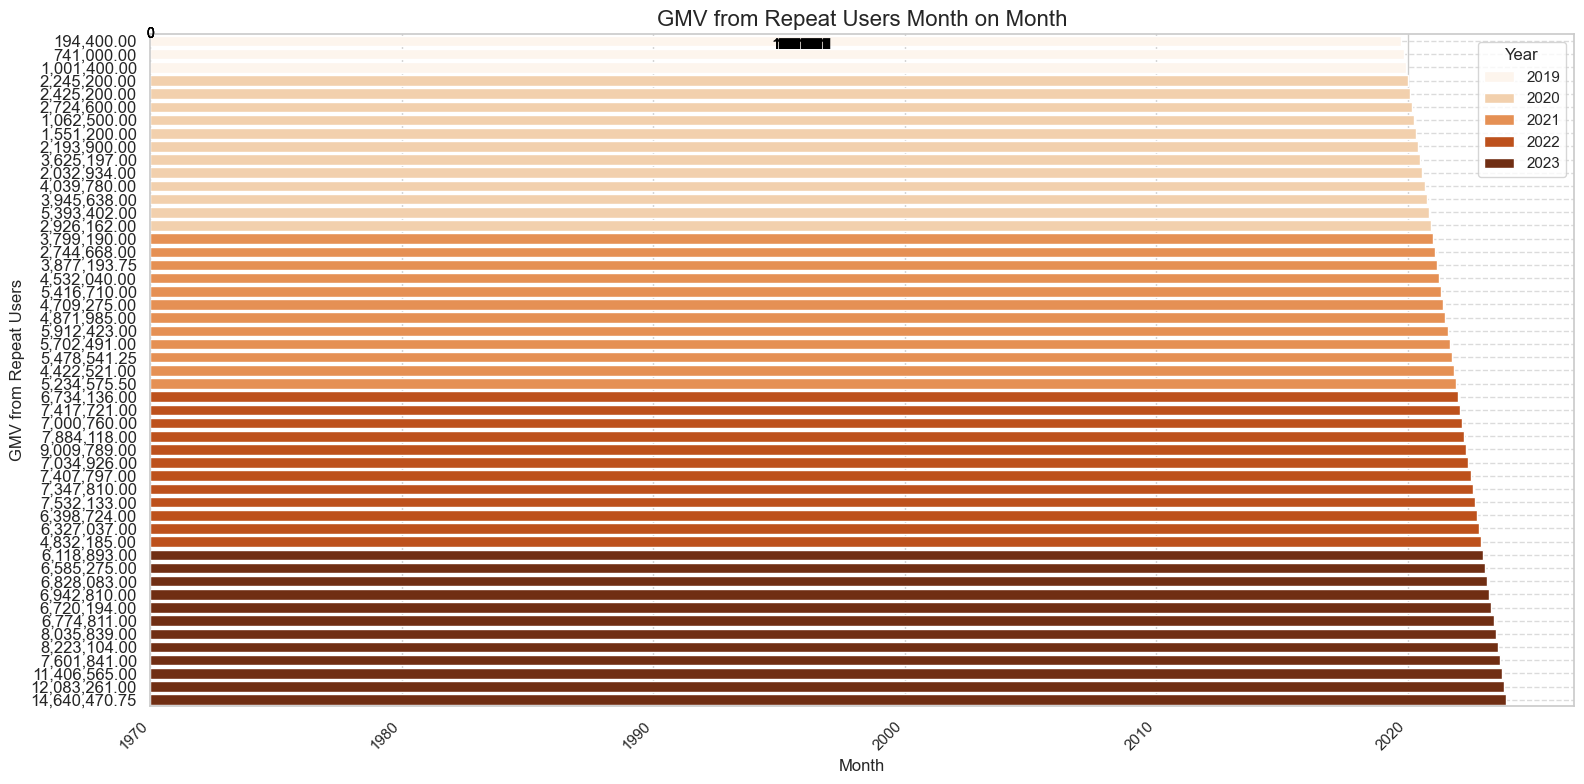

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Month' to datetime to access .dt.year (only works on datetime-like columns)
repeat_users_monthly['Month'] = pd.to_datetime(repeat_users_monthly['Month'], format='%Y-%m')

# Now extract the year from the 'Month' column
repeat_users_monthly['Year'] = repeat_users_monthly['Month'].dt.year

# Sort data by 'Year' and 'Month' to make sure months are in chronological order
repeat_users_monthly = repeat_users_monthly.sort_values(by=['Year', 'Month'])

# Set a professional style for the plot
sns.set(style="whitegrid")

# Create the figure and axis for the plot
plt.figure(figsize=(16, 8))  # Increased the height for better y-axis visibility

# Create the bar plot using 'Year' as the hue and set a custom bar width
ax = sns.barplot(x='Month', y='GMV from Repeat Users', data=repeat_users_monthly, palette='Oranges', hue='Year', width=0.8)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('GMV from Repeat Users', fontsize=12)
plt.title('GMV from Repeat Users Month on Month', fontsize=16)

# Improve y-axis clarity
plt.tick_params(axis='y', labelsize=12)  # Increase y-axis label font size

# Add horizontal gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Display the plot with tight layout to prevent clipping
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## 5) GMV Value of Category A, Month on Month:
Filter for products in category "A" and aggregate GMV by month.

In [65]:
import pandas as pd

# Filter for products in Category A
category_a = data[data['Category Name'] == 'A']

# Use .loc to avoid SettingWithCopyWarning and convert Period to Timestamp
category_a.loc[:, 'Month'] = category_a['Month'].dt.to_timestamp()

# Group by Month and sum the GMV for Category A
category_a_monthly = category_a.groupby('Month')['GMV'].sum().reset_index()

# Rename the column for clarity
category_a_monthly.rename(columns={'GMV': 'GMV Category A'}, inplace=True)

# Format the GMV values with commas
category_a_monthly['GMV Category A'] = category_a_monthly['GMV Category A'].apply(lambda x: f'{x:,.0f}')

# Display the result
display(category_a_monthly)


,Month,GMV Category A
0,2019-10-01,"205,800"
1,2019-11-01,"796,200"
2,2019-12-01,"1,040,400"
3,2020-01-01,"2,247,600"
4,2020-02-01,"2,425,200"
5,2020-03-01,"2,813,700"
6,2020-04-01,"1,098,000"
7,2020-05-01,"1,616,400"
8,2020-06-01,"2,325,600"
9,2020-07-01,"2,877,000"


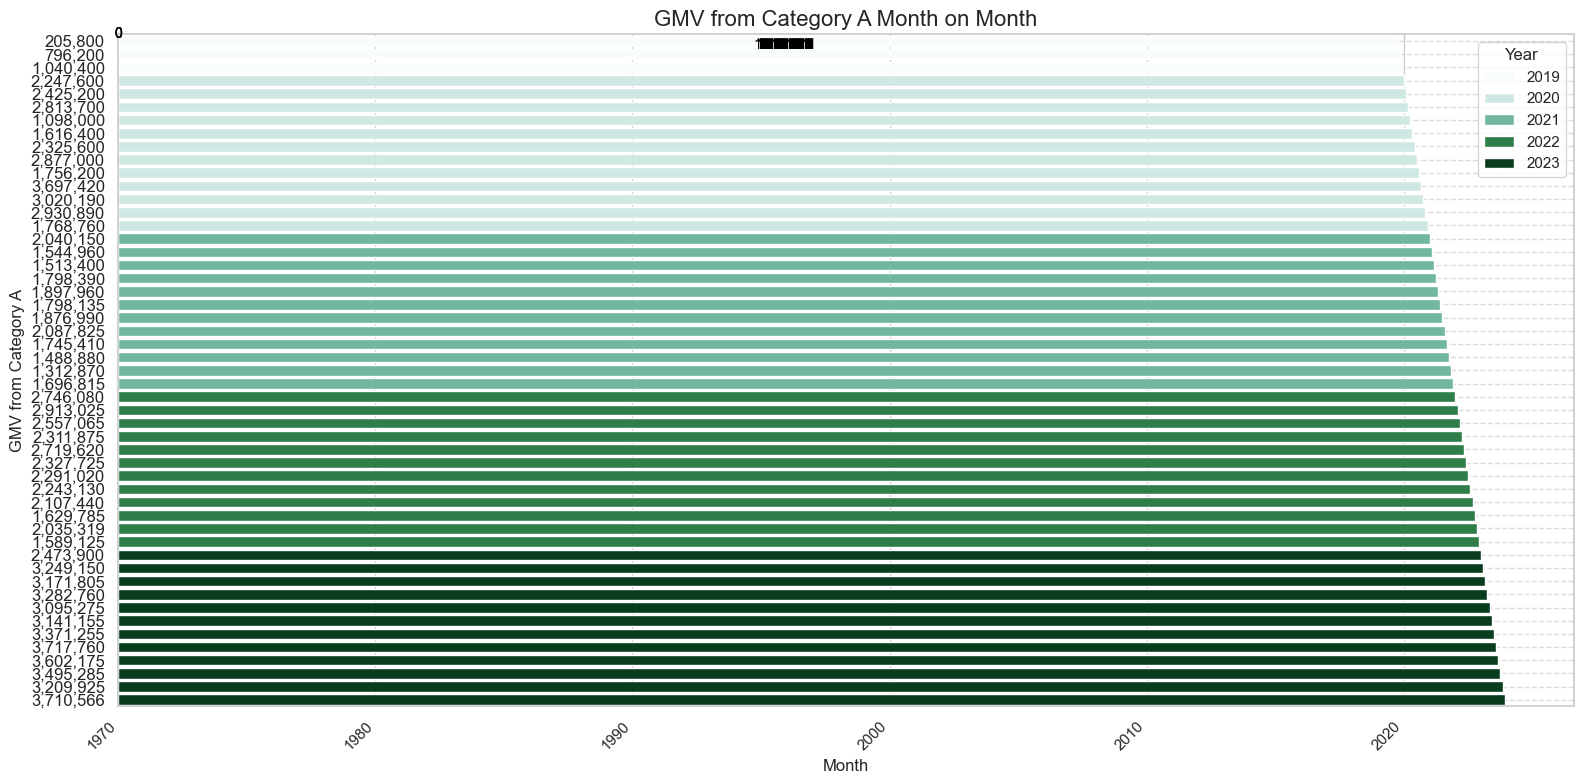

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for products in Category A
category_a = data[data['Category Name'] == 'A']

# Use .loc to avoid SettingWithCopyWarning and convert Period to Timestamp
category_a.loc[:, 'Month'] = category_a['Month'].dt.to_timestamp()

# Group by Month and sum the GMV for Category A
category_a_monthly = category_a.groupby('Month')['GMV'].sum().reset_index()

# Rename the column for clarity
category_a_monthly.rename(columns={'GMV': 'GMV Category A'}, inplace=True)

# Extract the year for hue
category_a_monthly['Year'] = category_a_monthly['Month'].dt.year

# Format the GMV values with commas for better readability
category_a_monthly['GMV Category A'] = category_a_monthly['GMV Category A'].apply(lambda x: f'{x:,.0f}')

# Set a professional style for the plot
sns.set(style="whitegrid")

# Create the figure and axis for the plot
plt.figure(figsize=(16, 8))

# Create the bar plot with 'Year' as the hue
ax = sns.barplot(x='Month', y='GMV Category A', data=category_a_monthly, palette='BuGn', hue='Year', width=0.8)

# Add value labels on top of each bar (formatted GMV)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('GMV from Category A', fontsize=12)
plt.title('GMV from Category A Month on Month', fontsize=16)

# Improve y-axis clarity
plt.tick_params(axis='y', labelsize=12)  # Increase y-axis label font size
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Display the plot with tight layout to prevent clipping
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## 6) Total GMV Value, Quarter on Quarter:
Extract the quarter from the order date and aggregate GMV.

In [71]:
# Extract the quarter from the 'Order Date' column
data['Quarter'] = data['Order Date'].dt.to_period('Q')

# Group by 'Quarter' and aggregate GMV
gmv_quarterly = data.groupby('Quarter')['GMV'].sum().reset_index()

# Rename the column for clarity
gmv_quarterly.rename(columns={'GMV': 'Total GMV'}, inplace=True)

# Format the 'Total GMV' column with commas
gmv_quarterly['Total GMV'] = gmv_quarterly['Total GMV'].apply(lambda x: f'{x:,.0f}')

# Display the result
display(gmv_quarterly)


,Quarter,Total GMV
0,2019Q4,"2,042,400"
1,2020Q1,"7,486,500"
2,2020Q2,"5,214,600"
3,2020Q3,"10,686,802"
4,2020Q4,"13,134,422"
5,2021Q1,"11,423,463"
6,2021Q2,"15,614,065"
7,2021Q3,"17,759,128"
8,2021Q4,"16,873,791"
9,2022Q1,"22,672,876"


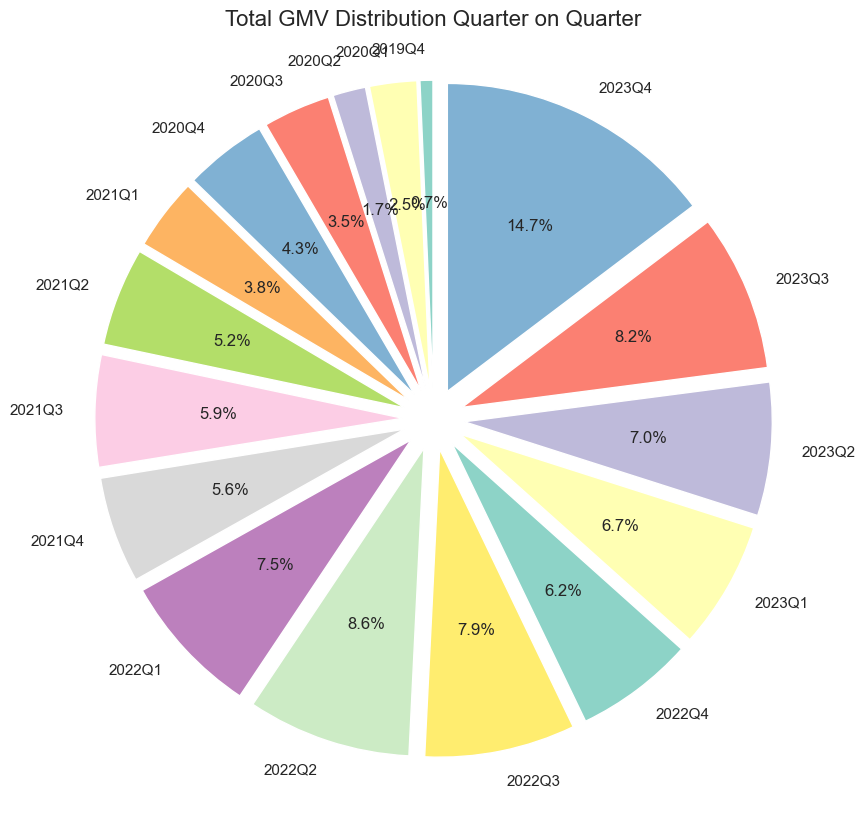

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the quarter from the 'Order Date' column
data['Quarter'] = data['Order Date'].dt.to_period('Q')

# Group by 'Quarter' and aggregate GMV
gmv_quarterly = data.groupby('Quarter')['GMV'].sum().reset_index()

# Rename the column for clarity
gmv_quarterly.rename(columns={'GMV': 'Total GMV'}, inplace=True)

# Format the 'Total GMV' column with commas
gmv_quarterly['Total GMV'] = gmv_quarterly['Total GMV'].apply(lambda x: f'{x:,.0f}')

# Plotting the pie chart
plt.figure(figsize=(10, 10))  # Increased figure size for better clarity
plt.pie(gmv_quarterly['Total GMV'].apply(lambda x: float(x.replace(',', ''))),  # Convert formatted strings back to numeric
        labels=gmv_quarterly['Quarter'].astype(str),  # Use the 'Quarter' as labels
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        startangle=90,  # Start the pie chart from 90 degrees
        colors=sns.color_palette("Set3", len(gmv_quarterly)),  # Set color palette
        explode=[0.1] * len(gmv_quarterly))  # Slightly "explode" each slice for better visibility

# Title and additional formatting
plt.title('Total GMV Distribution Quarter on Quarter', fontsize=16)

# Display the plot
plt.show()


## 7) How many people have bought >5 Categories ever:
Count how many unique consumers have purchased from more than 5 different categories.

In [78]:
from IPython.display import display, HTML

# Group by 'Email' and count the number of unique categories each customer bought from
category_count = data.groupby('Email')['Category Name'].nunique()

# Filter customers who bought from more than 5 categories and count them
people_more_than_5_categories = category_count[category_count > 5].count()

# Display the result
display(HTML(f"<h2 style='font-weight: bold;'>Number of customers who have bought from more than 5 categories: {people_more_than_5_categories}</h2>"))


In [76]:
# Check unique categories in the dataset
unique_categories = data['Category Name'].unique()

# Print the unique categories
print(f"Unique Categories in the dataset: {unique_categories}")

# If you want to know how many unique categories there are:
num_unique_categories = len(unique_categories)
print(f"Total number of unique categories: {num_unique_categories}")


Unique Categories in the dataset: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P']
Total number of unique categories: 16


Total number of unique categories: 16


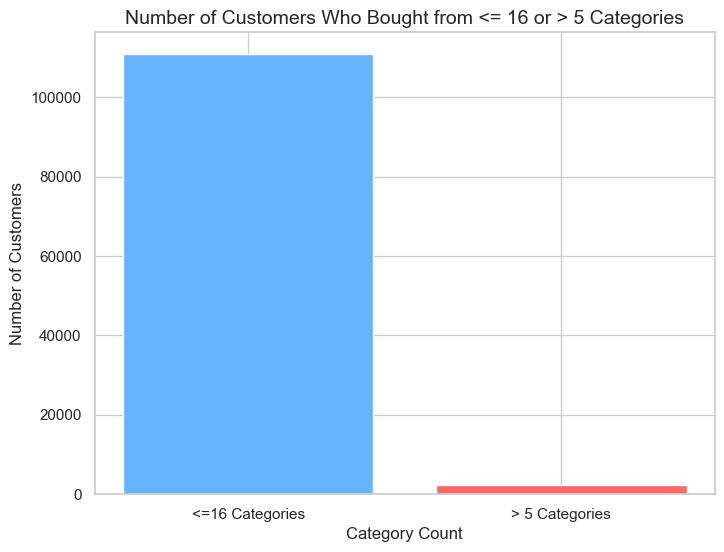

In [75]:
import matplotlib.pyplot as plt

# Step 1: Get the unique categories in the dataset
unique_categories = data['Category Name'].nunique()
print(f"Total number of unique categories: {unique_categories}")

# Step 2: Count the number of unique categories each customer has bought from
category_count = data.groupby('Email')['Category Name'].nunique()

# Step 3: Find customers who have bought from more than 5 categories
customers_more_than_5 = category_count[category_count > 5].count()

# Step 4: Find customers who have bought from 5 or fewer categories
customers_less_than_or_equal_5 = category_count[category_count <= 5].count()

# Prepare data for plotting
count_data = {
    f'<={unique_categories} Categories': customers_less_than_or_equal_5, 
    f'> 5 Categories': customers_more_than_5
}

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(count_data.keys(), count_data.values(), color=['#66b3ff', '#ff6666'])

# Adding labels and title
plt.xlabel('Category Count')
plt.ylabel('Number of Customers')
plt.title(f'Number of Customers Who Bought from <= {unique_categories} or > 5 Categories', fontsize=14)

# Show the plot
plt.show()


## 8) How many people bought both category A and D till date:
Find consumers who bought both categories A and D.

In [80]:
# Filter for customers who bought categories A or D
category_a_d = data[data['Category Name'].isin(['A', 'D'])]

# Group by 'Email' and count unique categories bought by each customer
category_a_d_counts = category_a_d.groupby('Email')['Category Name'].nunique()

# Count how many customers bought both A and D (i.e., bought exactly 2 unique categories)
both_a_d = (category_a_d_counts == 2).sum()

# Display the result
display(HTML(f"<h2 style='font-weight: bold;'>Number of customers who bought both Category A and D: {both_a_d}</h2>"))


## 9) How many people bought both category A and G till date:
Similar to the above, but with categories A and G.

In [82]:
# Filter data for Category A and G
category_a_g = data[data['Category Name'].isin(['A', 'G'])]

# Group by Email and check if both A and G are present in the set of categories purchased by each customer
both_a_g = category_a_g.groupby('Email')['Category Name'].apply(lambda x: set(['A', 'G']).issubset(x)).sum()

# Display the result
display(HTML(f"<h2 style='font-weight: bold;'>Number of customers who bought both Category A and G: {both_a_g}</h2>"))


## 10) How many people bought both category A and G but never bought D:
Filter for people who bought both A and G, but exclude those who bought D.

In [85]:
# Filter data for Category A, G, and D
category_a_g_d = data[data['Category Name'].isin(['A', 'G', 'D'])]

# Group by Email and apply the condition: both A and G, but not D
both_a_g_not_d = category_a_g_d.groupby('Email')['Category Name'].agg(
    lambda x: ('A' in x.values) and ('G' in x.values) and ('D' not in x.values)).sum()

# Display the result with large and bold formatting
from IPython.display import display, HTML
display(HTML(f"<h2 style='font-weight: bold;'>Number of customers who bought both Category A and G but never bought D: {both_a_g_not_d}</h2>"))


## 11) What is the single highest day sale (GMV):
Group by Order Date and sum GMV, then find the highest.

In [90]:
# Group by 'Order Date' and sum GMV for each day
daily_sales = data.groupby('Order Date')['GMV'].sum().reset_index()

# Find the highest GMV day
highest_day_sale = daily_sales.loc[daily_sales['GMV'].idxmax()].copy()  # Use .copy() to avoid the warning

# Format GMV with commas for better readability
highest_day_sale['GMV'] = f"{highest_day_sale['GMV']:,}"

# Format the 'Order Date' to remove the time part (keeping only the date)
highest_day_sale['Order Date'] = highest_day_sale['Order Date'].strftime('%Y-%m-%d')

# Display the result in bold using HTML
display(HTML(f"<h2 style='font-weight: bold;'>The highest GMV day was {highest_day_sale['Order Date']} with a GMV of {highest_day_sale['GMV']}</h2>"))


## 12) SKU wise Contribution of sales for 2023:
Filter for 2023 and group by Product Code to calculate GMV contribution.

In [92]:
import pandas as pd

# Filter data for the year 2023
data_2023 = data[data['Order Date'].dt.year == 2023]

# Group by 'Product Code' and sum GMV for each SKU
sku_sales_2023 = data_2023.groupby('Product Code')['GMV'].sum().reset_index()

# Calculate the total GMV for 2023
total_gmv_2023 = sku_sales_2023['GMV'].sum()

# Calculate the percentage contribution of each SKU
sku_sales_2023['Contribution (%)'] = (sku_sales_2023['GMV'] / total_gmv_2023) * 100

# Format the GMV values with commas
sku_sales_2023['GMV'] = sku_sales_2023['GMV'].apply(lambda x: f"{x:,.0f}")

# Round the Contribution percentage to 2 decimal places
sku_sales_2023['Contribution (%)'] = sku_sales_2023['Contribution (%)'].round(2)

# Display the result
display(sku_sales_2023)


,Product Code,GMV,Contribution (%)
0,P001,"2,279,215",2.06
1,P002,"2,405,137",2.17
2,P003,"4,180,234",3.77
3,P004,"2,392,991",2.16
4,P005,"2,506,272",2.26
...,...,...,...
251,P311,575,0.00
252,P312,"1,299",0.00
253,P313,"3,564",0.00
254,P314,"1,791",0.00


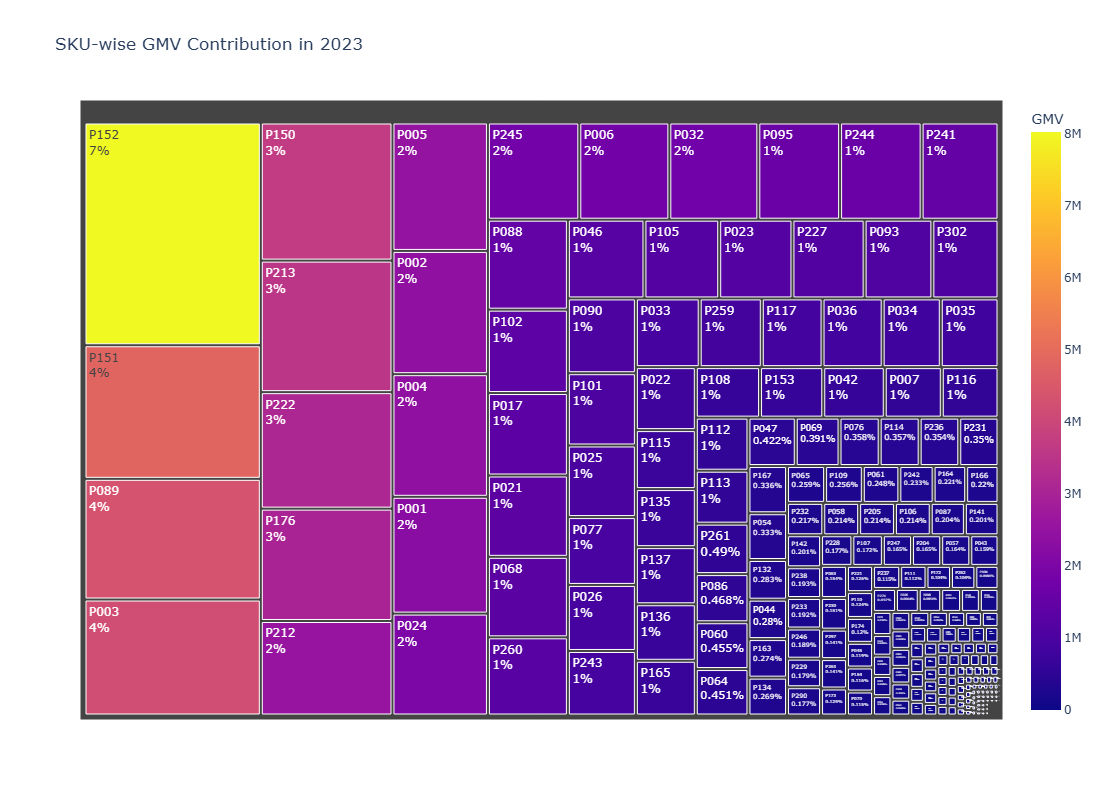

In [119]:
import pandas as pd
import plotly.express as px

# Filter for 2023
data_2023 = data[data['Order Date'].dt.year == 2023]

# Group by Product Code and calculate GMV
sku_sales_2023 = data_2023.groupby('Product Code')['GMV'].sum().reset_index()

# Filter out rows where GMV is zero to avoid division by zero error
sku_sales_2023 = sku_sales_2023[sku_sales_2023['GMV'] > 0]

# Sort by GMV for better visualization
sku_sales_2023_sorted = sku_sales_2023.sort_values(by='GMV', ascending=False)

# Plotting a Treemap of Product Code contributions
fig = px.treemap(sku_sales_2023_sorted, 
                 path=['Product Code'], 
                 values='GMV', 
                 color='GMV', 
                 hover_data=['Product Code', 'GMV'],
                 title="SKU-wise GMV Contribution in 2023")

# Enhance the visualization
fig.update_traces(
    textinfo="label+percent entry",  # Add labels and percentage info to each section
    maxdepth=3  # Limit depth to 3 levels
)

# Adjust layout for better visibility of smaller segments
fig.update_layout(
    width=1200,  # Width of the plot
    height=800,  # Height of the plot
    title="SKU-wise GMV Contribution in 2023",  # Title for the plot
    treemapcolorway=["#63C5DA", "#F6A800", "#F3A7B5", "#C0F0C0", "#B0B0B0"]  # Color palette for better contrast
)

# Show the plot
fig.show()


## 13) Category H Deep Dive:
### a) How many people came new to business because of H, in first 3 months?

Identify new users who bought category H in the first 3 months.

In [103]:
from IPython.display import display, HTML

# Filter for Category H and the first three months of any year
category_h = data[data['Category Name'] == 'H']
first_three_months = category_h[category_h['Order Date'].dt.month <= 3]

# Identify first purchase dates for each user
first_purchase = data.groupby('Email')['Order Date'].min().reset_index()
first_purchase['Month'] = first_purchase['Order Date'].dt.month

# Filter for new users who made their first purchase in Jan-Mar
new_users_h = first_three_months[first_three_months['Email'].isin(first_purchase[first_purchase['Month'] <= 3]['Email'])]

# Count the unique new users who bought Category H in the first 3 months
new_users_h_count = new_users_h['Email'].nunique()

# Output the result in bold using HTML
display(HTML(f"<h2 style='font-weight: bold;'>The number of new users who bought from Category H in the first 3 months is {new_users_h_count}</h2>"))



### b) How many people who were already buyers of the business, bought H in first 3 months?

Find users who had previous purchases before category H and bought it in the first 3 months.

In [104]:
from IPython.display import display, HTML

# Filter for Category H and the first three months of any year
category_h = data[data['Category Name'] == 'H']
first_three_months = category_h[category_h['Order Date'].dt.month <= 3]

# Identify first purchase dates for each user
first_purchase = data.groupby('Email')['Order Date'].min().reset_index()

# Filter for existing users (who have made purchases before)
existing_users_h = first_three_months[first_three_months['Email'].isin(
    first_purchase[first_purchase['Order Date'] < first_three_months['Order Date'].min()]['Email']
)]

# Count the unique existing users who bought Category H in the first 3 months
existing_users_h_count = existing_users_h['Email'].nunique()

# Output the result in bold using HTML
display(HTML(f"<h2 style='font-weight: bold;'>The number of existing users who bought from Category H in the first 3 months is {existing_users_h_count}</h2>"))


### c) How many people who were new to the brand from H, bought category A in the next 3 months?

Identify users who were new to the business from H and bought category A in the next 3 months.

In [105]:
from IPython.display import display, HTML

# Filter for Category H and the first three months of any year
category_h = data[data['Category Name'] == 'H']
first_three_months = category_h[category_h['Order Date'].dt.month <= 3]

# Identify first purchase dates for each user
first_purchase = data.groupby('Email')['Order Date'].min().reset_index()

# Identify users who were new to the brand (first purchase in Category H in the first three months)
new_to_brand_h = first_three_months[first_three_months['Email'].isin(first_purchase[first_purchase['Order Date'].dt.month <= 3]['Email'])]

# Get the date range for the next 3 months (April to June)
next_three_months_start = pd.Timestamp('2023-04-01')
next_three_months_end = pd.Timestamp('2023-06-30')

# Filter for purchases in Category A in the next 3 months
new_to_brand_h_in_A = data[(data['Email'].isin(new_to_brand_h['Email'])) &
                            (data['Category Name'] == 'A') &
                            (data['Order Date'] >= next_three_months_start) &
                            (data['Order Date'] <= next_three_months_end)]

# Count the unique users who bought Category A in the next 3 months
new_to_brand_h_in_A_count = new_to_brand_h_in_A['Email'].nunique()

# Display the result in bold using HTML
display(HTML(f"<h2 style='font-weight: bold;'>The number of users who were new to the brand from H and bought Category A in the next 3 months is {new_to_brand_h_in_A_count}</h2>"))


## 14) 30, 60, 90 day repeat rate of Category A:
Calculate how many customers bought category A within 30, 60, or 90 days after their first purchase.

In [109]:
# Filter for Category A purchases
category_a = data[data['Category Name'] == 'A'].copy()  # Use .copy() to ensure it's a new object

# Calculate the first purchase date for each user
category_a['First Purchase Date'] = category_a.groupby('Email')['Order Date'].transform('min')

# Calculate the number of days since the first purchase for each row
category_a['Days Since First Purchase'] = (category_a['Order Date'] - category_a['First Purchase Date']).dt.days

# Calculate the repeat rate for purchases within 30, 60, and 90 days after first purchase
# Repeat within 30 days (from the first purchase date)
repeat_30 = category_a[(category_a['Days Since First Purchase'] <= 30)]

# Repeat within 60 days, excluding those who already bought within 30 days
repeat_60 = category_a[(category_a['Days Since First Purchase'] > 30) & 
                       (category_a['Days Since First Purchase'] <= 60)]

# Repeat within 90 days, excluding those who already bought within 30 or 60 days
repeat_90 = category_a[(category_a['Days Since First Purchase'] > 60) & 
                       (category_a['Days Since First Purchase'] <= 90)]

# Count unique users who bought Category A within each time window
repeat_30_count = repeat_30['Email'].nunique()
repeat_60_count = repeat_60['Email'].nunique()
repeat_90_count = repeat_90['Email'].nunique()

# Output the results
from IPython.display import display, HTML
display(HTML(f"<h2 style='font-weight: bold;'>The number of users who bought Category A within 30 days: {repeat_30_count}</h2>"))
display(HTML(f"<h2 style='font-weight: bold;'>The number of users who bought Category A within 60 days: {repeat_60_count}</h2>"))
display(HTML(f"<h2 style='font-weight: bold;'>The number of users who bought Category A within 90 days: {repeat_90_count}</h2>"))


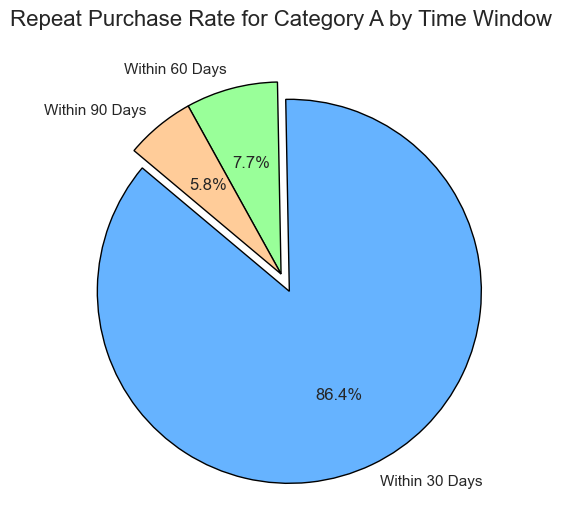

In [111]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Prepare data for the pie chart
labels = ['Within 30 Days', 'Within 60 Days', 'Within 90 Days']
sizes = [repeat_30_count, repeat_60_count, repeat_90_count]
colors = ['#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0)  # explode the first slice (30 days)

# Create the pie chart with larger size
plt.figure(figsize=(10, 8))  # Increase figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Repeat Purchase Rate for Category A by Time Window', fontsize=16)

# Centering the plot in the Jupyter notebook
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # Adjusting margins for centering
plt.show()


<center><h1><b>Thank You</b></h1></center>
